In [2]:
from pathlib import Path
import numpy as np
import torch
import cv2
import albumentations as A
import wandb

from dataset.image_utils import *
from dataset.datasets import *
from dataloader import config, train_loader, val_loader, test_loader
%reload_ext autoreload
%autoreload 2

In [3]:
A = iter(test_loader)
Batch = next(A)
Batch

{'image': tensor([[[[0.7961, 0.8078, 0.8196,  ..., 0.9608, 0.9490, 0.9373],
           [0.7961, 0.8078, 0.8196,  ..., 0.9608, 0.9490, 0.9412],
           [0.7961, 0.8039, 0.8196,  ..., 0.9608, 0.9529, 0.9412],
           ...,
           [0.6039, 0.6078, 0.6118,  ..., 0.0118, 0.0118, 0.0118],
           [0.6000, 0.6000, 0.6039,  ..., 0.0078, 0.0078, 0.0078],
           [0.5922, 0.5961, 0.6000,  ..., 0.0039, 0.0039, 0.0039]],
 
          [[0.6431, 0.6549, 0.6667,  ..., 0.7961, 0.7922, 0.7843],
           [0.6431, 0.6510, 0.6667,  ..., 0.8039, 0.8000, 0.7843],
           [0.6431, 0.6549, 0.6667,  ..., 0.8000, 0.8000, 0.7882],
           ...,
           [0.4824, 0.4863, 0.4902,  ..., 0.0118, 0.0118, 0.0118],
           [0.4784, 0.4784, 0.4824,  ..., 0.0078, 0.0078, 0.0078],
           [0.4706, 0.4745, 0.4784,  ..., 0.0039, 0.0039, 0.0039]],
 
          [[0.3412, 0.3529, 0.3647,  ..., 0.4667, 0.4784, 0.4745],
           [0.3412, 0.3529, 0.3647,  ..., 0.4706, 0.4824, 0.4784],
           [0.3

In [4]:
train_loader.batch_size

8

In [5]:
Batch["image"].shape

torch.Size([8, 3, 224, 224])

In [6]:
Batch["label"]

tensor([1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
config.dataset

DatasetSettings(train_path=WindowsPath('train'), val_path=WindowsPath('val'), test_path=WindowsPath('test'), train_preprocessing_config=WindowsPath('conf/train_preprocessing.yaml'), val_preprocessing_config=WindowsPath('conf/val_preprocessing.yaml'), loader_num_workers=2, train_size=0.6, batch_size=8)

In [10]:
DATASET_DIR = Path('train')
CONFIG_FILENAME = 'conf/train_preprocessing.yaml'

In [11]:
dataset = ImageDirsDataset(images_dir=DATASET_DIR, preprocessing_config=CONFIG_FILENAME)
len(dataset)

15000

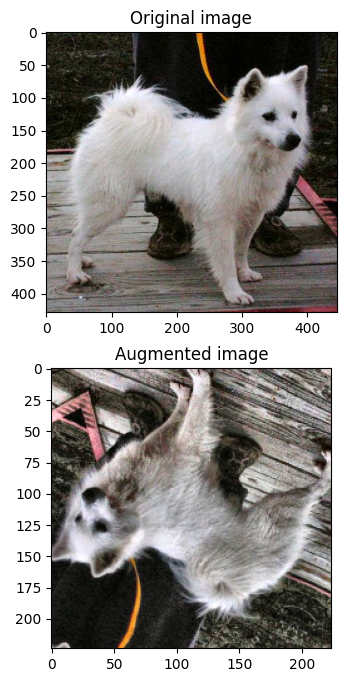

In [12]:
idx = np.random.randint(0, len(dataset))
sample = dataset[idx]

In [63]:
sample["label"]

0

In [14]:
sample["image"].max()

tensor(1.)

In [15]:
sample["image"].min()

tensor(0.)

In [16]:
sample["image"].shape

torch.Size([3, 224, 224])

In [17]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\shakh\.netrc


True

In [18]:
config_wdb = dict(
    epochs=2,
    classes=2,
    batch_size=train_loader.batch_size,
    learning_rate=0.001,
    dataset="cats-vs-dogs",
    architecture="densenet201")

In [54]:
from model import transfer_model, base_cnn_model
from train import train_model
from test import test
import torch.optim as optim
from torch.nn import BCELoss

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [20]:
optimizer = optim.Adam(transfer_model.parameters(), lr=0.01)

In [69]:
with wandb.init(project="demo-run-2", config=config_wdb):
      config = wandb.config
      #train_model(transfer_model, optimizer, BCELoss(), train_loader, val_loader, device, config)
      #and test its final performance
      test(transfer_model, test_loader, device)

tn: 2397 , fp: 129 , fn: 44 , tp: 2430
Accuracy: 96.54 %


In [79]:
print(torch.cuda.is_available())

False
